# Analyse av enzymkinetikkdata

I forrige laboratorieoppgave gjorde dere kinetikkmålinger på enzymet alkalisk fosfatase, som er vist nedenfor.

In [1]:
import nglview as nv

alkalisk_fosfatase = nv.show_pdbid("1ANJ")
alkalisk_fosfatase

NGLWidget()

Du skal nå lære hvordan du kan plotte og analysere enzymkinetikkdata med Python. Først tester vi analyseprogrammet vi lager, med eksempeldata. Dette gjør vi for å sørge for at programmet fungerer som det skal, slik at eventuelle feil som dukker opp, antakelig kan tilskrives dataene du har samlet inn selv.

Dersom du ønsker å friske opp Python-kunnskapene eller ikke har gjort mye Python-programmering før, kan du ta en kikk på nettsidene til IN-KJM1900, spesielt [delen om datahåndtering](https://andreasdh.github.io/programmering-i-kjemi/docs/datahandtering_visualisering/lese_filer.html).

Du kan bruke en valgfri editor til å programmere i denne oppgaven, for eksempel Spyder eller Jupyter Notebook. Du kan også bruke de interaktive editorene (Trinket) som er bygd inn i denne sida.

Det er også noen spørsmål til oppgave 1 som må besvares i Canvas og leveres iløpet av labdagen (Oppgave 1 Lab 5 - Programmere analyse av kinetikkdata).

## Del 1: Finne initialhastighetene

Før vi kan begynne å analysere Michaelis-Menten- og Lineweaver-Burk-plottene, må vi finne initialhastigheten til reaksjonen som en funksjon av substratkonsentrasjonen fra dataene våre av absorbansøkning over tid.

### Importere data
Vi har lagret eksempelenzymkinetikkdata våre i csv-filer, som du kan finne i KJM1140-mappen på Jupyter eller på Canvas under "Filer lab 5". CSV står for "comma-separated values", altså er dataene separert med komma (eller semikolon). Dette må vi i visse tilfeller gi informasjon om til programmet vårt, så det er viktig å vite.

La oss se på hvordan vi kan lese av fila. Det finnes mange måter å importere filer på i Python. Du kan velge den metoden du er mest komfortabel med. Det enkleste metoden er å bruke enten _read\_csv_ fra pandas-biblioteket eller _loadtxt_ fra numpy-biblioteket. De to metodene kan du se brukt nedenfor

````{tabbed} Lese fil med pandas
```{code-block} Python
import pandas as pd

data = pd.read_csv("Absorbans_tid.csv") # Leser fila

tid = data["tid"]
absorbans = data["absorbans"]
```
```` 

````{tabbed} Lese fil med loadtxt
```{code-block} Python
import numpy as np
data = pd.read_csv("Absorbans_tid.csv")

tid = data["tid"]
absorbans = data["absorbans"]
```
````

Fila du skal lese av, må ligge i samme mappe som programmet som skal analysere og lese fila. Eventuelt kan vi angi filbanen, f.eks. "datafiler/Absorbans_tid.csv". Vi kan også lese direkte fra internett, som vi snart skal se på. Da erstatter du filnavnet med en lenke.

## Lineærtilpasning av dataene

Lineær regresjon betyr å finne et polynom av første grad (en førstegradsfunksjon) som gir minst mulig gjennomsnittlig varians til et sett med datapunkter. Metodene vi skal bruke, benytter minste kvadraters metode for å estimere en slik funksjon. En mye funksjon som er ganske enkel å bruke til dette, er _polyfit_ fra numpy-biblioteket. Du kjenner kanskje til og med denne funksjonen fra før. Denne funksjonen gjør polynomregresjon med en vilkårlig grad av polynomet. 

Det polyfit-funksjonen derimot ikke kan estimere direkte, er andre typer regresjonsmodeller enn lineære, slik som eksponentialfunksjoner, logaritmefunksjoner eller logistiske funksjoner. Vi skal gjøre en logistisk regresjon seinere, og derfor benytter vi heller en annen funksjon som heter _curve\_fit_ fra scipy-biblioteket også når vi skal gjøre lineær regresjon. Denne funksjonen returnerer både koeffisientene i regresjonslinja og et mål på hvor godt modellen passer dataene (såkalt kovarians). Det er koeffisientene _a_ og _b_ i uttrykket $f(x) = ax + b$ som estimeres når vi gjør en linær regresjon.

I _curve\_fit_ må vi definere en funksjonsmodell på formen $f(x, a, b, c, ...)$ som brukes som utgangspunkt for regresjonen. Her skal vi definere en funksjon $f(x, a, b) = ax + b$.

````{admonition} Oppgave
:class: tip

1. Se på programmmet nedenfor og forklar hva det gjør, trinn for trinn.
2. Skriv ut variabelen _koeff_ og forklar hva den beskriver.
3. Lag et plott av absorbans som funksjon av tid. Plott både datapunktene og regresjonslinja. Husk aksetitler og gjerne merkelapper (labels/legend).
````

<iframe src="https://trinket.io/embed/python3/6243f62a04" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

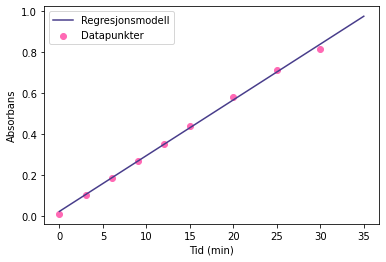

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

data = pd.read_csv("Absorbans_tid.csv")

tid = data["tid"]
absorbans = data["absorbans"]

# Definerer formen på regresjonsmodellen
def modell(x, a, b):
    return a*x + b

koeff, covar = opt.curve_fit(modell, tid, absorbans)
# Finn a og b her
V0 = koeff[0]
I = koeff[1]

# Beregner funksjonsverdier til den lineære tilpasningen
t = np.linspace(0,35,100) # Nye t-verdier å plotte med
y = V0*t + I               # Regresjonsmodellens y-verdier

# Plott funksjonen her
plt.scatter(tid, absorbans, color = "hotpink", label = "Datapunkter")
plt.plot(t, y, color = "darkslateblue", label = "Regresjonsmodell")
plt.xlabel("Tid (min)")
plt.ylabel("Absorbans")
plt.legend()
plt.show()

Du har nå et program som regner ut initialhastighetene for en bestemt substratkonsentrasjon. Men vi er interessert i å finne initialhastigheten som funksjon av substratkonsentrasjonen. Derfor vil vi gjøre samme prosedyre for alle de målte substratkonsentrasjonene. Vi gjentar dermed prosedyren ovenfor for flere filer med eksperimentelle data, og bruker dermed en løkke:

<iframe src="https://trinket.io/embed/python3/d393f85e0f" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

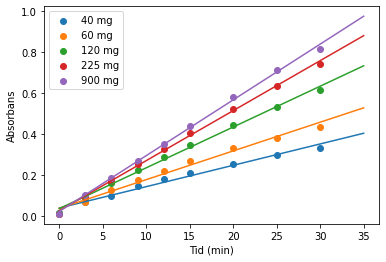

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

dataliste = ['S40.csv' ,'S60.csv' ,'S120.csv' ,'S225.csv' , 'S900.csv']
S = [40,60,120,225,900] # Substratkonsentrasjoner i mikrogram/L

# Definerer formen på regresjonsmodellen
def modell(x, a, b):
    return a*x + b

t = np.linspace(0,35,100) # Nye x-verdier å plotte med
V = [] # Initialhastigheter

for i in range(len(dataliste)):
    data = pd.read_csv(dataliste[i]) # Leser fila
    koeff, covar = opt.curve_fit(modell, data["tid"], data["absorbans"])
    V0 = koeff[0]
    I = koeff[1]
    y = V0*t + I               # Regresjonsmodellens y-verdier
    plt.scatter(data["tid"], data["absorbans"], label = str(S[i])+" mg")
    plt.plot(t, y)
    plt.xlabel("Tid (min)")
    plt.ylabel("Absorbans")
    V.append(V0) #legger til funnet initialhastighet til liste

# plt.savefig("initialhastigheter.png")
plt.legend()
plt.show()

# Lagrer dataene i en dataframe og skriver dem til en csv-fil
d = {"Hastighet": V, "Substratkonsentrasjon": S}
df = pd.DataFrame(d)
df.to_csv("Reaksjonshastigheter_test.csv", index = False)

Legg merke til at på slutten av en runde av løkken har vi lagt til den utregnde V0-verdien til en liste, _V_. I tillegg har vi puttet savefig(), legend() og show()-funksjonen utenfor løkken slik at vi får alle grafene i ett plott. Funksjonen savefig() vil lagre figuren i mappen du kjører programmet i, dersom du kjører programmet lokalt på PC-en din, men du kan også bare høyreklikke figuren for å lagre den.

````{admonition} Oppgave
:class: tip
1. Studer programmet ovenfor og forklar hva det gjør i store trekk. Kjør programmet og forklar hva figuren viser.
2. Skriv ut initialhastighetene du fant. Hvordan fant du disse, og hva forteller de deg?

````

## Del 2: Finne vmaks og Km fra Michaelis-Menten plott
Vi skal nå plotte og analysere resultatene fra del 1, altså skal vi lage et Michaelis-Menten-plott og tilpasse Michaelis-Menten likningen til verdiene vi fant for initialhastighetene. Vi har lagret substratkonsentrasjonene
og de tilhørende initialhastighetene i en .csv-fil, og vi skal bruke denne fila videre.

```{admonition} Oppgave
:class: tip
1. Les av fila du lagde i forrige program, og skriv ut initialhastighetene og tilhørende substratkonsentrasjoner for å se at du har lest inn fila korrekt.
2. Plott dataene slik at du får et Michaelis-Menten-plott (husk hvilken form grafen skal ha!). Husk aksetitler med korrekte enheter.
3. Forklar hva plottet sier deg.
```

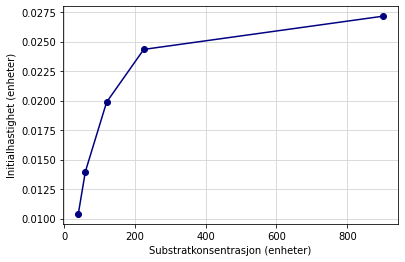

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv('Reaksjonshastigheter.csv')
V = data2["Hastighet"]
S = data2["Substratkonsentrasjon"]

plt.plot(S, V, marker = "o", color = "navy")
plt.ylabel('Initialhastighet (fyll inn enheter)')
plt.xlabel("Substratkonsentrasjon (enheter)")
plt.grid(color='lightgrey')
plt.show()

Nå skal vi lage en modellkurve som er basert på Michaelis-Menten-likningen. Denne kan vi definere som en Python-funksjon, slik:

In [7]:
def michaelis_menten(x, Vmax, Km):
    return Vmax*x/(Km + x)

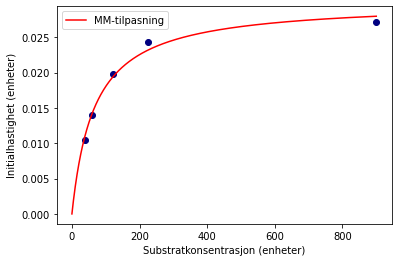

In [11]:
import scipy.optimize as opt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv('Reaksjonshastigheter.csv')
V = data2["Hastighet"]
S = data2["Substratkonsentrasjon"]

def michaelis_menten(x, Vmax, Km):
    return Vmax*x/(Km + x)

parametre, kovarians = opt.curve_fit(michaelis_menten, S, V)
Vmax = parametre[0]
Km = parametre[1]

x_ny = np.linspace(0, max(S), 1000)
y_model = michaelis_menten(x_ny, Vmax, Km)

plt.scatter(S, V, marker = "o", color = "navy")
plt.plot( x_ny, y_model, "r-", label="MM-tilpasning")
plt.ylabel('Initialhastighet (enheter)')
plt.xlabel("Substratkonsentrasjon (enheter)")
plt.legend()
plt.show()

## Del 3: Finne vmaks og Km fra Lineweaver-Burk plott
For å lage en Lineweaver-Burk-representasjon av dataene våre, må vi ta de inverse (resiproke) verdiene av hastighetene og substratkonsentrasjonen. Dette kan vi gjøre på flere måter, men siden V og S er arrayer, kan du kanskje tenke deg en rask måte å finne 1/V og 1/S på?

```{admonition} Oppgave
:class: tip
Ettersom Lineweaver-Burk likningen er lineær, kan vi nå bruke en linær modell for kurvetilpasningen vår, slik som i del 1. 

1. Regn ut de inverse verdiene til V og S. Verdiene må ligge i ei liste eller en array.
2. Inspiser de utregnede verdiene ved å printe dem ut.
3. Gjør en lineær regresjon, som i del 1, av de inverse dataene (NB: Pass på at holder styr på hva som er _x_- og _y_-verdier).
4. Fra Lineweaver-Burk modellen vet vi at skjæringspunktet tilsvarer 1/Vmaks og stigningstallet Km/Vmaks. Bruk dette til å regne ut $V_{maks}$ og $K_m$.
5. Plott Lineweaver-Burk-tilpasningen med de inverse verdiene og beskriv hva plottet forteller deg. Legg inn en _x_- og _y_-akse med henholdsvis _axhline(0)_ og _axvline(0)_ (gjerne med svart farge), slik at det er tydeligere å tolke resultatene.
6. Hvordan representerer Lineweaver-Burk tilpasningen data i forhold til Michaelis-Menten tilpasningen? For hvilke av de eksperimentelle målingene det størst forskjell på Michaelis-Menten- og Lineweaver-Burk-tilpasningen? Hva er grunnen til en eventuell forskjell? Diskuter dette med en labveileder [Skriv svar i Canvas].
```

stigningstall= 2529.3565710155945 
 V_maks= 0.03217232314277596 
 MM-konstant = 81.37527694601745


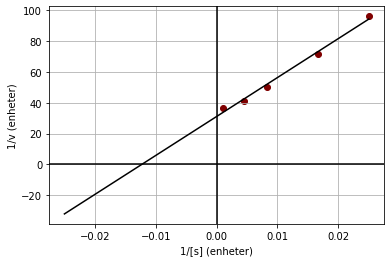

In [15]:
S_invers = 1/S
V_invers = 1/V

def modell(x, a, b):
    return a*x + b

koeffisienter, kovarians = opt.curve_fit(modell, S_invers, V_invers)
Km_vmaks = koeffisienter[0]
vmaks_invers = koeffisienter[1]

vmaks_LB = 1/vmaks_invers
km_LB = Km_vmaks*vmaks_LB

print('stigningstall=', Km_vmaks, '\n','V_maks=', vmaks_LB, '\n','MM-konstant =', km_LB)

x_ny = np.linspace(-max(S_invers), max(S_invers), 1000)
y_modell = Km_vmaks*x_ny + vmaks_invers

plt.scatter(S_invers, V_invers, color = "maroon")
plt.plot(x_ny, y_modell, color = "black")
plt.ylabel("1/v (enheter)")
plt.xlabel("1/[s] (enheter)")
plt.axhline(0,color='black')
plt.axvline(0, color='black')
plt.grid()
plt.show()

## Del 4: Plotte flere Lineweaver-Burk plott sammen
Om du vil tegne flere enn ett Lineweaver-Burk-plott i samme figur, kan du gjøre som i del 1: lage en løkke som går igjennom flere filer med data, analysere og plotte dataene. Eventuelt kan vi lage en funksjon som plotter et Lineweaver-Burk-plott, slik at vi kan bruke denne på flere filer. Dette vil for eksempel være interessant dersom vi vil sammenlikne resultatene for et enzym med og uten hemmer. For å teste dette skal vi se på et annet sett med enzymkinetikkdata.

Prostaglandiner er en klasse fettsyrederivater som har en kraftig virkning på vevet til virveldyr. De gir feber, betennelse og tilhørende smerte. Prostaglandiner dannes fra fettsyren arkidonsyre i en reaksjon som katalyseres av enzymet prostaglandinendoperoksidsyntase. Dette enzymet er en syklooksygenase, og bruker oksygen til å omdanne arkidonsyre til prostaglandin G2 (PGG2), forløperen for mange prostaglandiner.

Følgende kinetikkforsøk er utført hvor hastigheten for dannelse av PGG2 er bestemt med og uten hemmeren ibuprofen tilstede. Ibuprofen er et virkestoff som blant annet finnes i IBUX, og fungerer som en hemmer av prostaglandinendoperoksidsyntase. Dette reduserer betennelse og smerte. Fila "Reaksjonshastigheter_orginal.csv" beskriver reaksjonen uten hemmer, og fila "Reaksjonshastigheter_ibuprofen.csv" beskriver reaksjonen med hemmer.

```{admonition} Oppgave
:class: tip
1. Forklar hva programmet nedenfor gjør. 
2. Kjør programmet og forklar formen på grafen. Hva slags type hemmer er ibuprofen? [Svar i Canvas]
3. Skriv ut verdiene for $v_{maks}$ og $K_m$. Hvilke verdier fikk du for Km og vmaks med og uten hemmer? [Svar i Canvas]
```

<iframe src="https://trinket.io/embed/python3/fee43d470d" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

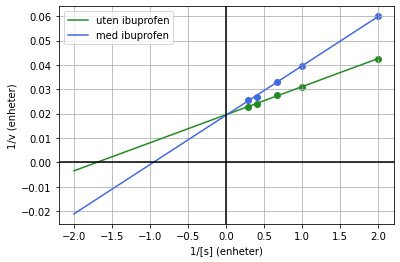

In [54]:
import pandas as pd

def Lineweaver_Burk(filnavn, farge, navn):
    """
    Funksjon som lager et Lineweaver-Burk-plott fra en datafil med
    reaksjonsfart i første kolonne og substratkonsentrasjon i andre kolonne.
    
    Parametre
    ---------
    filnavn: .txt- eller .csv-fil som innehodler reaksjonsfarten V og substratkonsentrasjonen S
    farge: ønsket farge på datapunktene og den tilpassede kurven.
    navn: merkelapper (labels) for kurven.
    
    Returnerer
    ----------
    vmaks: Maks reaksjonsfart
    km: Michaelis-Menten-konstanten
    """
    data = pd.read_csv(filnavn)
    V = data.iloc[:, 0] # Velger alle radverdier i første kolonne
    S = data.iloc[:, 1] # Velger alle radverdier i andre kolonne
    V_invers = 1/V
    S_invers = 1/S
    
    def modell(x, a, b):
        return a*x + b
    
    koeffisienter, kovarians = opt.curve_fit(modell, S_invers, V_invers)
    Km_vmaks = koeffisienter[0]
    vmaks_invers = koeffisienter[1]
    
    vmaks = 1/vmaks_invers
    km = Km_vmaks*vmaks
    
    x_ny = np.linspace(-max(S_invers), max(S_invers), 100)
    y_modell = Km_vmaks*x_ny + vmaks_invers

    plt.scatter(S_invers, V_invers, color = farge)
    plt.plot(x_ny, y_modell, color = farge, label = navn)
    return vmaks, km

vmaks_original, km_original = Lineweaver_Burk("Reaksjonshastigheter.csv", "forestgreen", "uten ibuprofen")
vmaks_ibux, km_ibux = Lineweaver_Burk("Reaksjonshastigheter_ibuprofen.csv", "royalblue", "med ibuprofen")
plt.ylabel("1/v (enheter)")
plt.xlabel("1/[s] (enheter)")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.legend()
show()

## Bruk av egne data: Analyse og rapport for laboratorieoppgave 4 – Enzymkinetikk

Dere skal nå bruke programmene dere har utforsket, til å analysere og visualisere deres egne enzymkinetikkdata fra laboratorieoppgave 4. Du kan benytte Trinket-vinduet nedenfor for å utføre analysene, eller du kan bruke en annen editor, for eksempel Spyder eller Jupyter Notebook. Du bør bruke kode fra programmene som du har beskrevet og laget ovenfor til analysen.

<iframe src="https://trinket.io/embed/python3/bf0291ab14" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

### Forsøk 1: Bestemmelse av $K_m$ og $v_{maks}$ for alkalisk fosfatase fra E. coli

Begynn med å lage inputfilene til programmet ditt. Du kan skrive dataene dine direkte inn i filen på .csv-format eller eksportere dem som .csv-filer fra eventuelle andre programmer du bruker for databehandling, som Excel. Dersom du eksporterte fra Logger Pro som CSV, vil filene dine allerede være på riktig format.

Fremstill initialhastigheten for de forskjellige prøvene uttrykt som absorbansøkning pr. min (= hastigheten) ved å plotte absorbansen som funksjon av tiden. Pass på at punktene du skal bruke for kurvetilpassing, fremdeles er i det lineære området. Gjør en lineærtilpasning for å finne initialhastighetene. Lag en figur som presenterer de eksperimentelle dataene og de tilhørende tilpasningene.

Lag deretter en visualisering av initialhastigheten som funksjon av substratkonsentrasjonen, som kan angis som mg PNPP (dinatriumsaltet) i 3,5 ml inkubasjonsblanding (mg/3,5 mL). Dette er Michaelis-Menten-plottet. Gjør en kurvetilpasning i Python for å finne $v_{maks]$ og $K_m$. Molekylvekten for dinatriumsaltet av p-nitrofenylfosfat heksahydrat settes lik 371,2 g/mol. Oppgi resultatet for $K_m$ i mol/L. 

Fremstill også resultatene i et Lineweaver-Burk-plott. Gjør også en lineærtilpasninger av datapunktene og finn $v_{maks]$ og $K_m$. Sammenlikn $v_{maks]$ og $K_m$ du får fra de to metodene. Husk å sette riktige enheter på alle verdier og grafer!

### Forsøk 2: Relasjon mellom reaksjonshastighet og enzymkonsentrasjon

Plott forløpet av reaksjonen i de tre prøvene. Du plotter igjen absorbansen som funksjon av tiden, og finner initialhastighetene som i del 1. Lag deretter en grafisk fremstilling av reaksjonshastigheten (økningen i absorbansen per minutt) som funksjon av enzymmengden (ml enzym).

Beregn antall enzymenheter pr. ml enzymekstrakt ut fra denne definisjonen:

```{admonition} Enzymenhet
1 enzymenhet (som et mål for enzymmengde) er her definert som den mengden enzym som i det benyttede inkubasjonssystemet (her: PNPP i 1 M Tris-HCl buffer pH 8,0 + enzym i et totalvolum på 3,5 ml) vil gi en absorbansøkning på 0,01 pr minutt.
```

### Forsøk 3. pH-optimum for den alkaliske fosfatasen

I dette forsøket har du målt absorbansen kun ved start og slutt. Det betyr at du her ikke skal gjøre en kurvetilpassing for å beregne hastigheten, men istedenfor bruke differansen i absorbans og dividere med tiden. Husk å korrigere de siste avlesningsverdiene for fortynningen med Tris. Lag en grafisk fremstilling av reaksjonshastigheten som funksjon av pH.

### Forsøk 4. Uorganisk fosfat som konkurrerende hemmer.

Plott absorbansen som funksjon av tiden, og bestem initialhastighene for hvert forsøk, som i forsøk 1. Fremstill grafisk 1/v som funksjon av 1/S i et separat Lineweaver-Burk-diagram med aksedimensjoner tilpasset dette forsøket. Plott også inn deler av diagrammet fra den ikke-hemmede reaksjonen i forsøk 1. Finn $K_m$ og $v_{maks}$, og sammenlign med forsøk 1.

### Rapport
Denne gangen skal vi trene på å skrive en mer fullstendig rapport. Dere skal levere inn en individuell rapport som skal inneholde: 

1. Introduksjon: En kort innledning for de fire delforsøkene hvor du skriver teori, bakgrunn og hensikten med forsøkene (ca. 1 side, maks 2)
2. Metoder: Et kort felles sammendrag av metodene (ca. 1/2 side – for detaljert prosedyre henviser du til laboppgaveteksten).
3. Resultater: En resultatdel som skal inneholde tabeller (med tabelltekst over tabellen) og grafer (med figurtekst under) av alle forsøkene.
4. Diskusjon: En kort diskusjon/analyse av resultatene (dette vil vanligvis være lengste del av rapporten). 
5. Utregninger og rådata puttes i appendiks på slutten av rapporten

På Canvas ligger det en rapportmal som beskriver hvordan rapporten burde legges opp med lab 2+3 som eksempel og vurderingsmatrise som brukes for vurdering av rapportene. Dere har 2 forsøk på å få godkjent labrapport. Lever inn rapporten (1 per person) for lab 4 og 5 i Canvas senest en uke etter denne labøvelsen (lab 5).